# Introduccion a Python para quimicos

Este primer trabajo práctico está destinado a introducir a los estudiantes de química en el lenguaje informático Python empleando cuadernos interactivos de Jupyter. 
Para hacerlo mas ameno, los conceptos se introducen en el contexto de la resolución de problemas comunes de la química general y analítica.

### 1. Construcción de una curva de calibración

En este primera parte se presentará el uso de python para graficar listas de puntos y luego ajustar esos puntos a funciones. El enfoque aquí estará en la creación de curvas de calibración usando soluciones estándar.

Antes de hacer algo en Python, es una buena idea importar primero las dependencias que necesitaremos. Para esta primera parte, usaremos numpy para calcular ajustes no lineales, matplotlib para crear los gráficos y el paquete stats de scipy para realizar el ajuste lineal

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Considere la siguiente relación entre una serie de soluciones estándar y la señal medida en un instrumento:

| Concentración de ión plata (ppb) | Señal (arb.) |
|:--------:|:--------:|
| 0.00 | 0.000 |
| 2.00 | 0.013 |
| 10.0 | 0.076 |
| 20.0 | 0.162 |
| 30.0 | 0.245 |
| 50.0 | 0.405 |
| 75.0 | 0.598 |
| 100.0 | 0.748 |
| 125.0 | 0.817 |
| 150.0 | 0.872 |

Para crear una curva de calibración, primero creamos dos listas. La primera, que serán nuestros valores de x, con las concentracions de iones de plata, y la segunda, que serán nuestros valores de y, para las señal. Luego podemos graficar estos puntos.

<div class="alert alert-block alert-info">
NOTA: Una lista en Python es una estructura de datos formada por una secuencia ordenada de elementos. Para crear una lista en Python, simplemente hay que encerrar la secuencia de elementos separados por comas entre paréntesis cuadrados [ ]<br>


<code>
>>> lista = [1, 2, 3, 4]
</code>

</div>

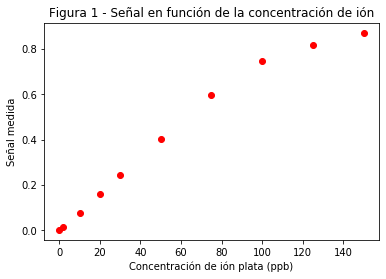

In [45]:
xrange = [0,2,10,20,30,50,75,100,125,150] 
yrange = [0,0.013,0.076,0.162,0.245,0.405,0.598,0.748,0.817,0.872]
plt.plot(xrange,yrange,'ro')
plt.title("Figura 1 - Señal en función de la concentración de ión")
plt.xlabel('Concentración de ión plata (ppb)') 
plt.ylabel('Señal medida')
plt.show()

A continuación, usaremos la función linregress() que hemos importado de la parte de estadísticas de la biblioteca scipy, para encontrar un ajuste lineal para los puntos. 
Debido a que hay cierta curvatura en el extremo superior de la curva de calibración, usaremos una variable, a la que llamaremos listend, para definir el último punto que se incluirá en el ajuste lineal.

La ecuación lineal para el ajuste es y = 6.9437E-03 x + 2.2576E-02, con un valor de R2 de 0.98481.


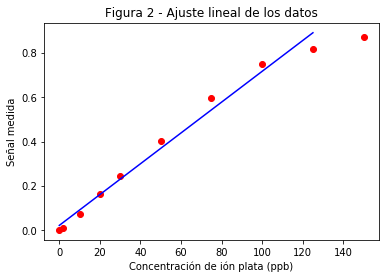

In [46]:
listend = len(xrange)-1      # ignoramos el ultimo punto 
xsubrange = xrange[0:listend]
ysubrange = yrange[0:listend]
slope,intercept,r,tt,stderr=stats.linregress(xsubrange,ysubrange)
print("La ecuación lineal para el ajuste es y = {0:1.4E} x + {1:1.4E}, con un valor de R2 de {2:1.5f}.".format(slope, intercept, r**2))
linfit = [i*slope + intercept for i in xsubrange]
plt.plot(xrange,yrange,'ro')
plt.plot(xsubrange,linfit,'b-')
plt.title("Figura 2 - Ajuste lineal de los datos")
plt.xlabel('Concentración de ión plata (ppb)')
plt.ylabel('Señal medida')
plt.show()

<div class="alert alert-block alert-info">
NOTA: Para acceder a un elemento de una lista se utilizan los índices. Un índice es un número entero que indica la posición de un elemento en una lista. El primer elemento de una lista siempre comienza en el índice 0. 

    

<code>
>>> lista = [1, 2, 3, 4]
>>> lista[1]
2
</code>


En Python está permitido usar índices negativos para acceder a los elementos de una lista. En este caso, el índice -1 hace referencia al último elemento de la lista, el -2 al penúltimo y así, sucesivamente: 


<code>
>>> lista[-1]
4
</code>

También es posible acceder a un subconjunto de elementos de una lista ("slicing") utilizando rangos en los índices, empleando el operador [:]. 


<code>
>>> lista[1:4]              #elementos desde el índice 1 hasta el 4-1
[2,3,4]
</code>


</div>




<div class="alert alert-block alert-warning">

#### Actividad 1

<ul>
<li> ¿Cual será la concentración de ión plata para una señal de 0.5? </li>

<li> Modifique la variable listend para ver cómo al cambiar los puntos sobre los que graficamos, cambia el valor R2 del ajuste lineal. </li>

<li> Cambie el gráfico para que los puntos sean círculos azules y la línea sea una línea discontinua roja. Para ello puede revisar la documentación de la libreria matplotlib https://matplotlib.org/ </li>
 
</ul> 
</div>


In [ ]:
# ESCRIBA SUS RESPUESTAS EN ESTA CELDA 

### 2. Funciones en Python 

Cuando estamos calculando concentraciones de equilibrio, generalmente podemos usar una tabla ICE (Inicial, Cambio, Equilibrio) para crear una ecuación polinomial y luego resolver la ecuación resultante. Por ejemplo si queremos calcular la solubilidad del cloruro de plata en agua: 

$$\textrm{AgCl} \rightarrow \textrm{Ag}^{+}_{(aq)} + \textrm{Cl}^{-}_{(aq)} \qquad \textrm{K}_{sp} = 1.82 \textrm{x} 10^{-10}$$  

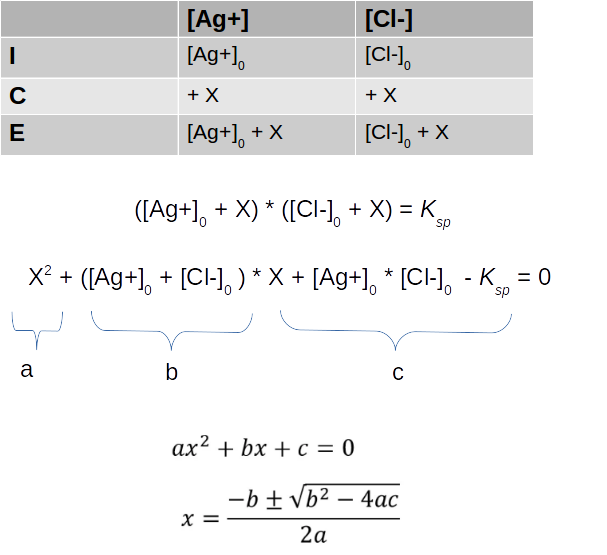

Considerando concentraciones iniciales de iones igual a cero, los coeficientes de la ecuación cuadrática quedan: a = 1, b = 0, and c = -1.82 x 10$^{-10}$ y la solubilidad del AgCl es x = 1.35 x 10$^{-5}$

Ahora tomemos en cuenta el efecto del ion común y calculemos la solubilidad de AgCl en 0.1M KCl. En este caso, la tabla ICE nos da: a = 1, b = 0.1, y c = -1.82 x 10$^{-10}$ y la solubilidad del AgCl se reduce a x = 1.82 x 10$^{-9}$

Ahora si queremos calcular la solubilidad del AgCl para concentraciones variables de KCl, lo mas práctico es escribir una función de python que pueda resolver la ecuación cuadrática (que llamaremos quad\_solve), y luego usarla para encontrar [Ag$^{+}$]. 

Como recordatorio, una función (ya sea una función matemática o una función de computadora) es algo que toma algunas entradas, las manipula de alguna manera y luego devuelve los resultados manipulados. Para escribir una función en python, primero la definimos (usando "def"), luego todas las líneas que forman parte de la función deben estar  indentadas en 1 tab y finalmente usamos "return" para decirle a la función qué resultado debe devolver. 



In [14]:
def quad_solve(a, b, c):
    discrim = np.sqrt(b**2 - 4 * a * c)
    sol1 = (-b + discrim)/(2 * a)
    sol2 = (-b - discrim)/(2 * a)
    return [sol1,sol2]

Tenga en cuenta que el solucionador de funciones cuadráticas que hemos escrito devuelve ambas raíces, por lo que debemos tener cuidado al elegir la raíz correcta.
Para verificar que quad\_solve funciona correctamente, preguntemosle sobre la solubilidad del AgCl para [KCl] = 0.0 y 0.1M y comparemos con los resultados anteriores. 

In [16]:
solutions = quad_solve(1,0,-1.82E-10) # en agua a = 1, b = 0, c = -1.82E-10 
corrsol="{:.2E}".format(solutions[0])
print("La solubilidad del AgCl in en agua pura es",corrsol)

solutions = quad_solve(1,0.1,-1.82E-10) # en 0.1M de KCl a = 1, b = 0.1, c = -1.82E-10 
corrsol="{:.2E}".format(solutions[0])
print("La solubilidad del AgCl in 0.1M de KCl es",corrsol)


La solubilidad del AgCl in en agua pura es 1.35E-05
La solubilidad del AgCl in 0.1M de KCl es 1.82E-09


<div class="alert alert-block alert-warning">
    
#### Actividad 2

<ul>
<li> Grafique la solubilidad de AgCl en soluciones de KCl en función de la concentración de KCl, de 0 a 0,1 M. </li>

<b>Ayuda:</b> La forma más fácil de graficar cosas en python es crear listas de puntos que representen valores de x e y, similar a lo que hicimos previamentes con la curva de calibración. 
Use la función linspace() del paquete numpy para crear un conjunto de 100 puntos distribuidos uniformemente entre 0.00001 y 0.1 que representen las diferentes concentraciones de KCl (que serán los puntos x), y luego use la función quad\_solve con esos puntos x para encontrar la solubilidad de AgCl (que serán los puntos y). Luego grafique esos puntos x, y con la función plot() del paquete matplotlib.pyplot. Aplique la función log10 de numpy a los valores de y para visualizar mejor la tendencia.<br> 
<br>

<li> ¿Que efecto tiene el ión común sobre la solubilidad del AgCl?</li>

</ul>

</div>

In [41]:
# ESCRIBA SUS RESPUESTAS EN ESTA CELDA 

Estas mismas gráficas podriamos haberlas construido con Excel, no?. Sin embargo, en casos en los que ocurren múltiples reacciones que afectan las concentraciones de equilibrio, necesitaremos resolver múltiples ecuaciones simultáneamente, que normalmente no son lineales. Por ejemplo, agreguemos una ecuación adicional a nuestro problema: 

$$\textrm{Ag}^{+}_{(aq)} + \textrm{2 Cl}^{-}_{(aq)} \rightarrow \textrm{AgCl}^{-}_{2(aq)} \qquad \textrm{K}_{F} = 1.78 \textrm{x} 10^{5}$$ 

Para encontrar la solubilidad del AgCl en este caso usaremos la función fsolve() del paquete scipy. La función fsolve() emplea un proceso iterativo para encontrar la solución de un conjunto de ecuaciones y funciona con ecuaciones no lineales!. Para nuestro problema tenemos cuatro concentraciones desconocidas: ([$\textrm{Ag}^{+}_{(aq)}$], [$\textrm{Cl}^{-}_{(aq)}$], [$\textrm{AgCl}^{-}_{2(aq)}$], [$\textrm{K}^{+}_{(aq)}$]), por lo tanto necesitaremos cuatro ecuaciones. Tambien necesitamos proporcionar a fsolve() las concentraciones  iniciales de los iones. En principio, supongamos que la concentración de KCl es 0,1 M. Por lo tanto, nuestro estado inicial es: [Ag$^{+}$] = [$\textrm{AgCl}^{-}_{2(aq)}$] = 0 y [Cl$^{-}$] = [K$^{+}$] = 0.1 M. Además, debido a que fsolve() requiere tambien una función como entrada, necesitamos escribir una función a la que llamaremos  AgCl\_sol2(), que devolverá las cuatro ecuaciones. 


In [22]:
import scipy.optimize as opt

initAg = initAgCl2 = 0
initCl = initK = 0.1

initparams = (initAg, initAgCl2, initCl, initK)

def AgCl_sol2(concentrations):
    (Ag_conc2, AgCl2_conc2, Cl_conc2, K_conc2) = concentrations
    
    firstEq = Ag_conc2 * Cl_conc2 - 1.82E-10
    secondEq = AgCl2_conc2 - Ag_conc2 * Cl_conc2 ** 2 * 1.78E5
    thirdEq = Ag_conc2 + K_conc2 - Cl_conc2 - AgCl2_conc2
    fourthEq = K_conc2 - K_conc2
    
    return[firstEq, secondEq, thirdEq, fourthEq]

solution = opt.fsolve(AgCl_sol2,initparams)

solubility = "{:.2E}".format(solution[0] + solution[1])

print("A una concentration de KCl de", initK, "la solubilidad del AgCl es", solubility)

A una concentration de KCl de 0.1 la solubilidad del AgCl es 3.24E-06


Notese que la solubilidad total del AgCl en este caso será [$\textrm{Ag}^{+}_{(aq)}$] + [$\textrm{AgCl}^{-}_{2(aq)}$].

Preste atención a la función AgCl\_sol2(). ¿De donde vienen la 1era, 2da, 3era y 4ta ecuación? Notará que las cuatro  se manipularon de modo que sean igual a cero. Este es un requisito de la función fsolve(). 

Ahora puedo usar la funciones AgCl\_sol2() y fsolve() para calcular y graficar la solubilidad de AgCl en KCl, con una concentración de KCl que va desde cerca de cero hasta 0,1 M. 

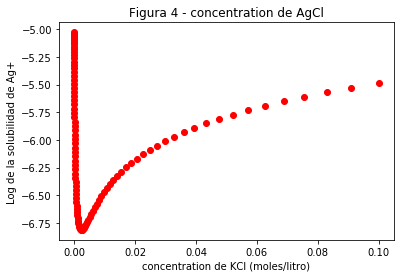

In [26]:
guess_array2 = tuple(zip(np.zeros(datapts),np.zeros(datapts),logxrange,logxrange))

out_array2 = []
silver_conc2 = []
silverchloride_conc2 = []
chloride_conc2 = []
potassium_conc2 = []

for num in range(0,datapts):
    out_array2.append(list(opt.fsolve(AgCl_sol2,guess_array2[num])))
    silver_conc2.append(out_array2[num][0])
    silverchloride_conc2.append(out_array2[num][1])    
    chloride_conc2.append(out_array2[num][2])
    potassium_conc2.append(out_array2[num][3])

total_solubility = np.add(silver_conc2, silverchloride_conc2)

plt.plot(potassium_conc2,np.log10(total_solubility),'ro')
plt.title("Figura 4 - concentration de AgCl")
plt.xlabel('concentration de KCl (moles/litro)')
plt.ylabel('Log de la solubilidad de Ag+')
plt.show()

Aquí vemos un comportamiento muy diferente para la solubilidad del cloruro de plata de lo que predijimos anteriormente, comportamiento que en realidad es consistente con lo que se observa experimentalmente.

### 3. Análisis Estadístico con Pandas 

Esta sección se enfoca en leer datos a partir de archivos y analizar grandes conjuntos de datos con el paquete "Pandas" de python. En particular, vamos a analizar 22 años (recopilados y registrados cada 15 minutos) de datos de calidad del agua recopilados un estuario en la Bahía de Monterey (Estados Unidos). 
Primero importamos los paquetes necesarios.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Importemos el conjunto de datos, un archivo csv que contiene varias mediciones de agua. Descargar el archivo de: https://drive.google.com/file/d/1X_FMfg-o-rmHUDih9AzeSmJ23ZYNmz5g/view?usp=sharing <br>
Pandas tiene la capacidad de leer una variedad de diferentes tipos de archivos de datos, por lo que debemos usar la función correcta para leer nuestro archivo, que es un archivo csv (valores separados por comas).Asegúrese de cambiar la ruta a cualquier directorio en el que coloque el archivo de datos (ELKSMWQ.csv). 

In [28]:
path = ""
WaterFilename = "ELKSMWQ.csv"
WaterData = pd.read_csv(path+WaterFilename, header=2, skipfooter=51, engine='python')

Hay datos en el archivo que no necesitamos, así que deshagámonos de algunas de las columnas de datos. Además, debido a la forma en que se recopilaron los datos, la importación de pandas no puede decir qué tipo de datos hay en el archivo. Entonces, definamos qué tipo de datos hay en cada columna (enteros, caracteres, float, fechas).

In [29]:
WaterDataAbrev = WaterData.drop(['isSWMP','Historical','ProvisionalPlus','F_Record','F_Temp','F_SpCond','F_Sal','F_DO_pct','F_DO_mgl','F_Depth','F_cDepth','F_Level','cLevel','F_cLevel','F_pH','F_Turb','cDepth','Level','Turb','Unnamed: 28'], axis=1)
WaterDataAbrev=WaterDataAbrev.astype({'Temp':'float','SpCond':'float','Sal':'float','DO_pct':'float','DO_mgl':'float','Depth':'float','pH':'float'})
WaterDataAbrev.DateTimeStamp = pd.to_datetime(WaterDataAbrev.DateTimeStamp)

Veamos que quedo: 

In [30]:
WaterDataAbrev

,Station_Code,DateTimeStamp,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH
0,elksmwq,1996-04-01 00:00:00,16.1,46.12,30.0,114.9,9.4,1.40,8.4
1,elksmwq,1996-04-01 00:15:00,16.1,45.69,29.6,114.8,9.4,1.34,8.4
2,elksmwq,1996-04-01 00:30:00,16.2,46.19,30.0,114.5,9.4,1.28,8.4
3,elksmwq,1996-04-01 00:45:00,16.4,45.68,29.6,114.8,9.4,1.20,8.4
4,elksmwq,1996-04-01 01:00:00,16.4,45.85,29.8,114.7,9.4,1.13,8.4
...,...,...,...,...,...,...,...,...,...
618377,elksmwq,2018-05-22 22:45:00,16.7,50.95,33.5,83.0,6.6,NaN,8.0
618378,elksmwq,2018-05-22 23:00:00,16.8,50.98,33.5,83.2,6.6,NaN,8.0
618379,elksmwq,2018-05-22 23:15:00,16.8,50.98,33.5,82.1,6.5,NaN,8.0
618380,elksmwq,2018-05-22 23:30:00,16.8,51.00,33.5,80.4,6.4,NaN,8.0


Algunas cosas a tener en cuenta sobre los datos. Primero, hay 618,382 filas de datos. ¡Son muchos datos! Lo suficiente como para que incluso usando un programa convencional, como Excel, sea muy lento. En segundo lugar, hay 9 columnas de datos. La primera columna es el código de la estación, solo un identificador de dónde se recolectaron los datos. La segunda columna es la hora y la fecha en que se recopilaron los datos. La tercera columna es la temperatura del agua (en °C). Algunas de las entradas de datos son NaN (NaN = Not a Number), y otras son -296.6 °C. Esos son errores obvios de los que podríamos querer ocuparnos en algún momento. La cuarta columna es la conductividad específica del agua (en miliSiemens (mS)/cm), la quinta columna es la salinidad del agua (en unidades prácticas de salinidad (psu)), la sexta columna es la cantidad de oxígeno disuelto (en porcentaje de saturación), la séptima columna es la cantidad de oxígeno disuelto (en mg/L), la octava columna es la profundidad del agua de la medición (en metros) y la novena columna es el pH del agua.


Veamos si hay alguna correlación entre las columnas.

In [31]:
WaterDataAbrev.corr()

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH
Temp,1.000000,0.297409,0.340337,-0.144920,-0.398509,-0.185076,-0.095806
SpCond,0.297409,1.000000,0.977717,-0.116938,-0.244538,0.048964,0.281564
Sal,0.340337,0.977717,1.000000,-0.129917,-0.265002,0.048657,0.221414
DO_pct,-0.144920,-0.116938,-0.129917,1.000000,0.959745,-0.034994,0.378883
DO_mgl,-0.398509,-0.244538,-0.265002,0.959745,1.000000,-0.006197,0.347486
Depth,-0.185076,0.048964,0.048657,-0.034994,-0.006197,1.000000,0.032644
pH,-0.095806,0.281564,0.221414,0.378883,0.347486,0.032644,1.000000


Parece haber cierta correlación, en particular entre el pH y el oxígeno disuelto y la salinidad, así como entre la temperatura y la profundidad del agua. Ahora, probemos algunas de las características más geniales de los pandas. Primero, establezcamos la columna de fecha/hora como nuestro índice (seria nuestra variable independiente).

In [32]:
OrderedWaterData=WaterDataAbrev.set_index('DateTimeStamp')

Ahora podemos hacer que Pandas haga todo tipo de análisis estadístico por nosotros, sin que tengamos que preocuparnos por los detalles o reescribir algoritmos. Por ejemplo, veamos el promedio semanal de la salinidad:

In [33]:
OrderedWaterData.resample('W')['Sal'].mean()

DateTimeStamp
1996-04-07    30.505060
1996-04-14    30.767708
1996-04-21    31.256250
1996-04-28    30.792932
1996-05-05    33.284226
                ...    
2018-04-29    30.875149
2018-05-06    30.944196
2018-05-13    31.826935
2018-05-20    33.279911
2018-05-27    33.359896
Freq: W-SUN, Name: Sal, Length: 1156, dtype: float64

También podemos graficar los datos durante un cierto período de tiempo. Por ejemplo, ¿cómo cambió la salinidad desde mayo de 1996 hasta junio de 1996?

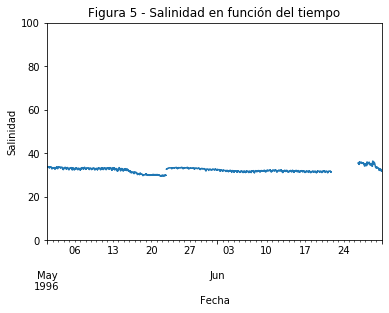

In [34]:
SalinityPlot = OrderedWaterData['1996-May':'1996-Jun']['Sal']
SalinityPlot.plot()
plt.title("Figura 5 - Salinidad en función del tiempo")
plt.xlabel('Fecha')
plt.ylabel('Salinidad')
ax = plt.gca()
ax.set_ylim(0,100)
plt.show()

Vamos a crear una nueva tabla de datos para los datos de los promedios semanales y agregaremos las desviaciones estándar. Sin embargo, vamos a ignorar la columna de profundidad porque no parece muy importante y muchas de las entradas de datos son NaN.

In [36]:
weekly_summary = pd.DataFrame()
weekly_summary['Temp'] = OrderedWaterData.resample('W')['Temp'].mean()
weekly_summary['TempErr'] = OrderedWaterData.resample('W')['Temp'].std()
weekly_summary['SpCond'] = OrderedWaterData.resample('W')['SpCond'].mean()
weekly_summary['SpCondErr'] = OrderedWaterData.resample('W')['SpCond'].std()
weekly_summary['Sal'] = OrderedWaterData.resample('W')['Sal'].mean()
weekly_summary['SalErr'] = OrderedWaterData.resample('W')['Sal'].std()
weekly_summary['DO_pct'] = OrderedWaterData.resample('W')['DO_pct'].mean()
weekly_summary['DO_pctErr'] = OrderedWaterData.resample('W')['DO_pct'].std()
weekly_summary['DO_mgl'] = OrderedWaterData.resample('W')['DO_mgl'].mean()
weekly_summary['DO_mglErr'] = OrderedWaterData.resample('W')['DO_mgl'].std()
weekly_summary['pH'] = OrderedWaterData.resample('W')['pH'].mean()
weekly_summary['pHErr'] = OrderedWaterData.resample('W')['pH'].std()
weekly_summary

,Temp,TempErr,SpCond,SpCondErr,Sal,SalErr,DO_pct,DO_pctErr,DO_mgl,DO_mglErr,pH,pHErr
DateTimeStamp,,,,,,,,,,,,
1996-04-07,16.591220,1.724669,46.870030,1.073929,30.505060,0.773155,95.431399,29.499533,7.707143,2.247789,8.252083,0.135045
1996-04-14,16.328571,1.377676,47.235060,1.351055,30.767708,0.976375,25.684524,24.457572,2.077083,1.963302,7.831399,0.141039
1996-04-21,15.392857,1.371873,47.927768,1.691262,31.256250,1.223682,11.230655,17.229722,0.926637,1.416011,7.780655,0.148256
1996-04-28,18.311579,1.788897,47.253549,1.029468,30.792932,0.742489,5.923379,16.266982,0.464706,1.281977,7.836241,0.080628
1996-05-05,17.938244,2.592252,50.679836,0.504622,33.284226,0.381097,96.279911,23.266789,7.437649,1.596941,7.545238,0.112715
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-29,16.711012,1.591697,47.369539,0.136077,30.875149,0.103407,79.006399,16.123329,6.359821,1.162539,7.740923,0.119516
2018-05-06,16.829464,1.326097,47.462455,0.173550,30.944196,0.143500,72.599405,15.552721,5.843304,1.219556,7.780952,0.106958
2018-05-13,17.992411,1.382503,48.661503,0.453646,31.826935,0.338979,75.935714,14.208356,5.938393,1.039481,7.758036,0.110928


Comparemos la salinidad promedio semanal de 1997 con la de 2007, para ver si hay alguna diferencia.

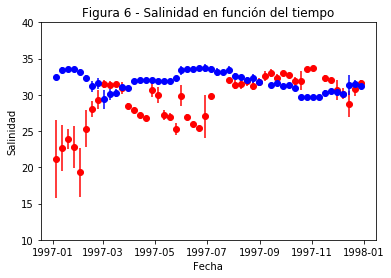

In [38]:
WeeklySalinityPlot1 = weekly_summary['1997-Jan':'1997-Dec']['Sal']
WeeklySalinityErr1 = weekly_summary['1997-Jan':'1997-Dec']['SalErr']

WeeklySalinityPlot2 = weekly_summary['2007-Jan':'2007-Dec']['Sal']
WeeklySalinityErr2 = weekly_summary['2007-Jan':'2007-Dec']['SalErr']

plt.errorbar(WeeklySalinityPlot1.index, WeeklySalinityPlot1, yerr = WeeklySalinityErr1, fmt='ro')
plt.errorbar(WeeklySalinityPlot1.index, WeeklySalinityPlot2, yerr = WeeklySalinityErr2, fmt='bo')
plt.title("Figura 6 - Salinidad en función del tiempo")
plt.xlabel('Fecha')
plt.ylabel('Salinidad')
ax = plt.gca()
ax.set_ylim(10,40)
ax.set_ylim
plt.show()

Pareciera ser que la salinidad en 2007 (en azul) es más alta que la salinidad en 1997, al menos en los primeros meses.

<div class="alert alert-block alert-warning">

#### Actividad 3

<ul>
    
<li> Ahora su tarea es comparar promedios mensuales de pH, en lugar de promedios semanales de salinidad. </li>

<b>Ayuda:</b> En primer lugar, cree un nueva tabla de datos (Data frame), similar al anterior, pero con el nombre  monthly_averages y que consista en promedios mensuales y desviaciones estándar.<br>
<br>
    

<li> Grafique el pH promedio mensual para 1998, 2003 y 2008 en el mismo gráfico.</li>

<li> ¿El pH varía de un año a otro? Explique.</li>
</ul>

</div>

In [40]:
# ESCRIBA SUS RESPUESTAS EN ESTA CELDA 

### Referencias
* https://pubs.acs.org/doi/10.1021/acs.jchemed.9b01131
* https://github.com/parkersruth/python-for-chemists
* https://pythoninchemistry.org/